# Udacity Case Study-1

## Investigate chemical properties of wine, associated with their quality readings.
     (Cleaning, feature engineering and visualizing)

### Loading libraries and files

In [206]:
import pandas as pd
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')
# Setting this additional parameter (sep=';') because all data were read into one column and values are separated by semicolon

# Importing matplotlib for visuals
import matplotlib.pyplot as plt

%matplotlib inline


### Investigating Red wine Data

In [207]:
red_df.shape

(1599, 12)

In [208]:
# Checking Nans 
red_df.isnull().sum().sum()
count_nan_in_red_df = df_r.isnull().sum()
print (count_nan_in_red_df )

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [209]:
# Checking Duplicates
sum(red_df.duplicated())

240

In [210]:
# number of unique values for quality 
print(red_df['quality'].nunique())

6


In [211]:
# Mean density of the red wine dataset
red_df.loc[:,"density"].mean()

0.9967466791744831

Investigating White wine Data

In [212]:
white_df.shape

(4898, 12)

In [213]:
# Checking Nans 
white_df.isnull().sum().sum()
count_nan_in_white_df = white_df.isnull().sum()
print (count_nan_in_white_df)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [214]:
# Checking Duplicates
sum(white_df.duplicated())

937

In [215]:
# number of unique values for quality 
print(white_df['quality'].nunique())

7


In [216]:
# Mean density of the white wine dataset
white_df.loc[:,"density"].mean()

0.9940273764801896

Combining the red and white datasets to make analysis more efficient. 
Use NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes.

In [217]:
# Create Color Columns
# Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.
import numpy as np

In [218]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

In [219]:
# Add arrays to the red and white dataframes, by setting a new column called 'color' to the appropriate array. 
# Adding array for the red dataframe
red_df['color'] = color_red
red_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [220]:
# Adding array for the white dataframe
white_df['color'] = color_white
white_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

Combine DataFrames with Append
Combining red and white dataframes in a new dataframe  wine_df 
Check the documentation for Pandas' append function to combine the dataframes.

In [221]:
# append dataframes
wine_df = red_df.append(white_df, ignore_index=True)

# view dataframe to check for success
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [222]:
# Save Combined Dataset
# Save newly combined dataframe as winequality_edited.csv. 
# Remember, set index=False to avoid saving with an unnamed column!
new_df = wine_df.to_csv ("winequality_edited.csv") 

In [223]:
new_df

In [224]:
df_winequality = pd.read_csv('winequality_edited.csv')

In [225]:
df_winequality

Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0              0            7.4              0.70         0.00   
1              1            7.8              0.88         0.00   
2              2            7.8              0.76         0.04   
3              3           11.2              0.28         0.56   
4              4            7.4              0.70         0.00   
...          ...            ...               ...          ...   
6492        6492            6.2              0.21         0.29   
6493        6493            6.6              0.32         0.36   
6494        6494            6.5              0.24         0.19   
6495        6495            5.5              0.29         0.30   
6496        6496            6.0              0.21         0.38   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                1.9      0.076                 11.0                  34.0   
1                2.6      0.098                 25.0                  67.0   
2                2.3      0.092                 15.0                  54.0   
3                1.9      0.075                 17.0                  60.0   
4                1.9      0.076                 11.0                  34.0   
...              ...        ...                  ...                   ...   
6492             1.6      0.039                 24.0                  92.0   
6493             8.0      0.047                 57.0                 168.0   
6494             1.2      0.041                 30.0                 111.0   
6495             1.1      0.022                 20.0                 110.0   
6496             0.8      0.020                 22.0                  98.0   

      density    pH  sulphates  alcohol  quality  color  
0     0.99780  3.51       0.56      9.4        5    red  
1     0.99680  3.20       0.68      9.8        5    red  
2     0.99700  3.26       0.65      9.8        5    red  
3     0.99800  3.16       0.58      9.8        6    red  
4     0.99780  3.51       0.56      9.4        5    red  
...       ...   ...        ...      ...      ...    ...  
6492  0.99114  3.27       0.50     11.2        6  white  
6493  0.99490  3.15       0.46      9.6        5  white  
6494  0.99254  2.99       0.46      9.4        6  white  
6495  0.98869  3.34       0.38     12.8        7  white  
6496  0.98941  3.26       0.32     11.8        6  white  

[6497 rows x 14 columns]

### Exploring with Visuals

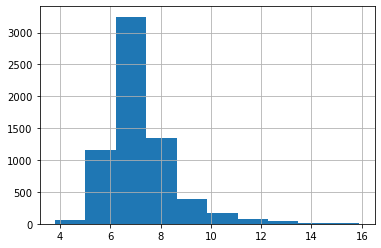

In [226]:
df_winequality['fixed acidity'].hist();

Fixed acidity appear  to be right skewed.

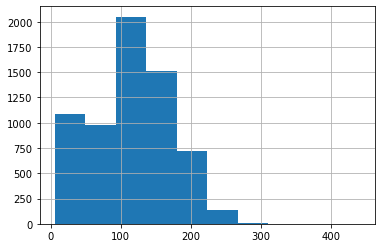

In [227]:
df_winequality['total sulfur dioxide'].hist() ;

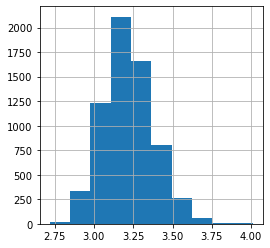

In [228]:
df_winequality['pH'].hist(figsize=(4,4)) ;

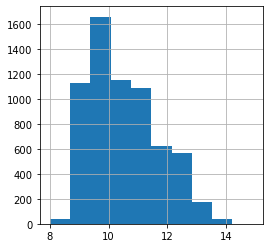

In [229]:
df_winequality['alcohol'].hist(figsize=(4,4)) ;

### Scatterplots of Quality Against Various Features

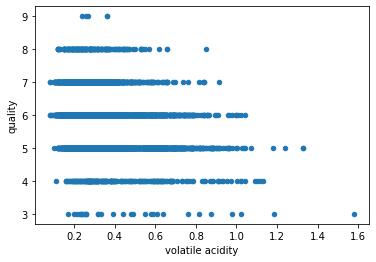

In [230]:
df_winequality.plot(x='volatile acidity', y='quality', kind='scatter') ;

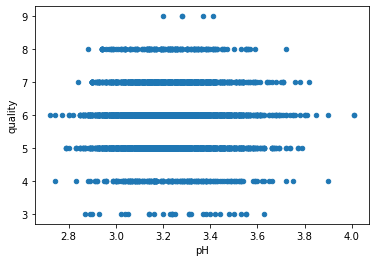

In [231]:
df_winequality.plot(x='pH', y='quality', kind='scatter') ;

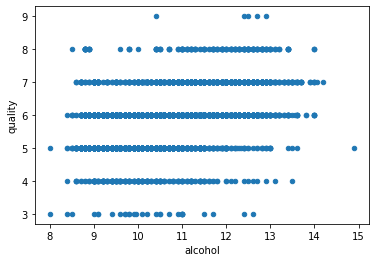

In [232]:
df_winequality.plot(x='alcohol', y='quality', kind='scatter') ;

Alchohol is most likely to have a positive impact on quality.

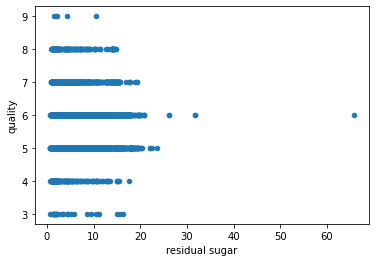

In [233]:
df_winequality.plot(x='residual sugar', y='quality', kind='scatter') ;

### Drawing Conclusions Using Groupby

#### Is a certain type of wine associated with higher quality?

In [234]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [235]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21 , 3.32 , 4.01] # Fill in this list with five values you just found

In [236]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [237]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color acidity_levels  
0      9.4        5   red            low  
1      9.8        5   red       mod_high  
2      9.8        5   red         medium  
3      9.8        6   red       mod_high  
4      9.4        5   red            low

In [238]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

Therefor, Low acidity level receives the highest mean quality rating

In [239]:
# Find the mean quality of each type of wine with groupby
wine_df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

Mean quality of red wine is less than that of white wine